# Investigate Syracusano data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import os
import numpy as np 
import pandas as pd 
from scipy.io import loadmat

In [4]:
path = "/Users/nate/datasets/siracusano2019AE/"


In [15]:
train = loadmat(os.path.join(path,"Training_dataset_15000AE_1000_samples.mat"))
xtrain = train["XTrain"].tolist()
ytrain = pd.read_csv(os.path.join(path, "YTrain.csv"), header=None)

test = loadmat(os.path.join(path,"Testing_dataset_1650AE_1000_samples.mat"))
xtest = test["XTest"].tolist()
ytest = pd.read_csv(os.path.join(path, "YTest.csv"), header=None)

In [17]:
test = pd.DataFrame({"waveform":xtest, "label":ytest[0].values})
test["test_or_train"] = "test"

train = pd.DataFrame({"waveform":xtrain, "label":ytrain[0].values})
train["test_or_train"] = "train"

data = pd.concat([train,test])

In [18]:
data.to_pickle(os.path.join(path, "siracusano.pkl"))

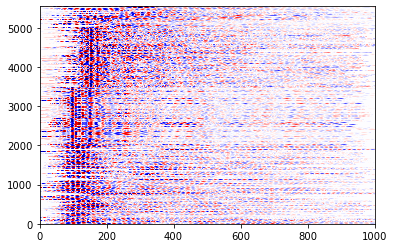

In [20]:
plt.pcolormesh(np.stack(data[data.label==1]["waveform"]), cmap="seismic")

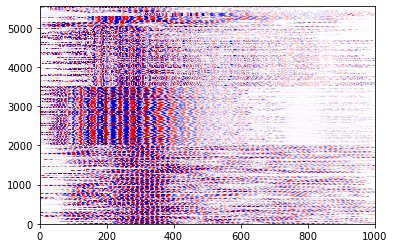

In [21]:
plt.pcolormesh(np.stack(data[data.label==2]["waveform"]), cmap="seismic")

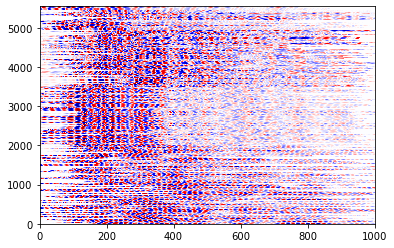

In [22]:
plt.pcolormesh(np.stack(data[data.label==3]["waveform"]), cmap="seismic")

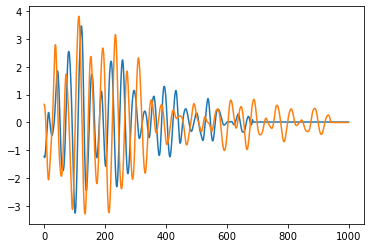

In [25]:
plt.plot(data[data.label==3]["waveform"].values[-1])
plt.plot(data[data.label==3]["waveform"].values[3000])